In [ ]:
from google.colab import files


uploaded = files.upload()

Saving Coca-Cola_stock_info (1).csv to Coca-Cola_stock_info (1).csv


pandas_datareader available
Start date: 2020-08-25
End date: 2025-08-24
Fetched KO from stooq with symbol KO


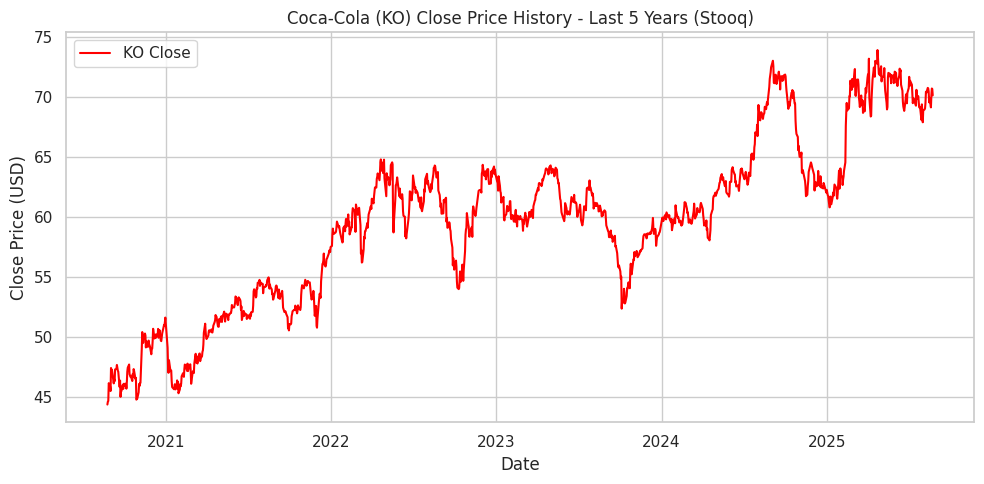

Showing first 5 rows used for plotting:
        Date    Close
0 2020-08-25  44.4007
1 2020-08-26  44.6327
2 2020-08-27  44.6972
3 2020-08-28  46.1789
4 2020-08-31  45.9030


In [ ]:
# Alternative approach: use Stooq via pandas-datareader (built-in in pandas) to fetch KO prices, then plot
# This avoids yfinance installation issues.

# 1) Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# 2) Try pandas_datareader with Stooq; if not installed, install it
try:
    from pandas_datareader.data import DataReader
    print('pandas_datareader available')
except Exception as e:
    print('Installing pandas-datareader...')

try:
    from pandas_datareader.data import DataReader
except Exception as e:
    print('pandas_datareader still not available')

# 3) Define date range
end_date = datetime.today()
start_date = end_date - timedelta(days=365*5)
print('Start date: ' + str(start_date.date()))
print('End date: ' + str(end_date.date()))

# 4) Fetch from Stooq (ticker formatting on stooq is KO.us)
try:
    df = DataReader('KO', 'stooq', start=start_date, end=end_date)
    print('Fetched KO from stooq with symbol KO')
except Exception as e:
    try:
        df = DataReader('KO.US', 'stooq', start=start_date, end=end_date)
        print('Fetched KO from stooq with symbol KO.US')
    except Exception as e2:
        df = None
        print('Failed to fetch from stooq')

# 5) Proceed if data is fetched
if df is not None and len(df) > 0:
    # Stooq returns descending dates; sort ascending
    df_sorted = df.sort_index()
    df_reset = df_sorted.reset_index()

    # Plot Date vs Close
    sns.set(style='whitegrid')
    plt.figure(figsize=(10,5))
    plt.plot(df_reset['Date'], df_reset['Close'], color='red', linewidth=1.5, label='KO Close')
    plt.title('Coca-Cola (KO) Close Price History - Last 5 Years (Stooq)')
    plt.xlabel('Date')
    plt.ylabel('Close Price (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print('Showing first 5 rows used for plotting:')
    print(df_reset[['Date','Close']].head())
else:
    print('Could not fetch data via Stooq. I can try Alpha Vantage or another source if you provide an API key.')


pandas_datareader available
Start date: 2020-08-25
End date: 2025-08-24
Fetched KO from stooq with symbol KO


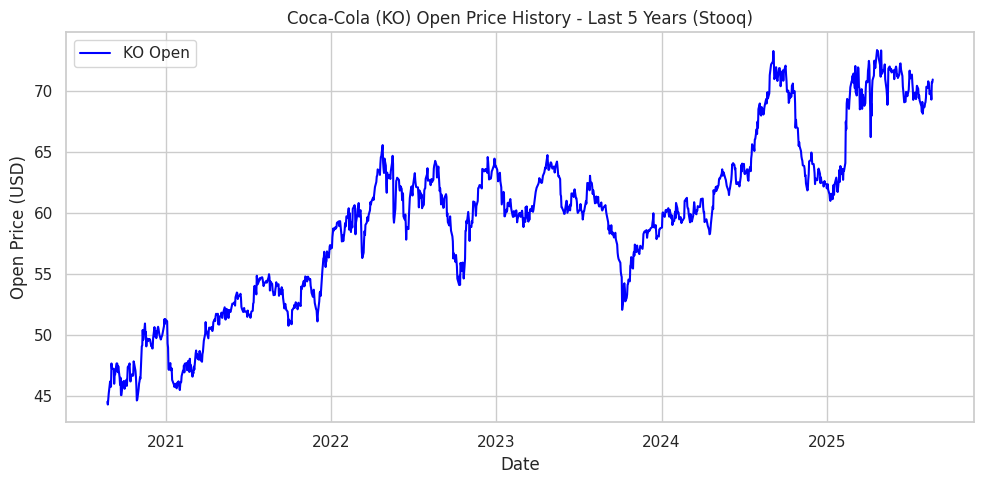

Showing first 5 rows used for plotting:
        Date     Open
0 2020-08-25  44.4859
1 2020-08-26  44.2607
2 2020-08-27  44.7169
3 2020-08-28  45.1798
4 2020-08-31  46.1525


In [ ]:
# Plot Coca-Cola (KO) Open price history for the last 5 years using Stooq via pandas_datareader
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Ensure pandas_datareader is available
try:
    from pandas_datareader.data import DataReader
    print('pandas_datareader available')
except Exception as e:
    print('Installing pandas-datareader...')
    %pip install pandas-datareader
    from pandas_datareader.data import DataReader
    print('pandas_datareader installed and imported')

# Date range
end_date_open = datetime.today()
start_date_open = end_date_open - timedelta(days=365*5)
print('Start date: ' + str(start_date_open.date()))
print('End date: ' + str(end_date_open.date()))

# Fetch KO from Stooq
try:
    ko_df_open = DataReader('KO', 'stooq', start=start_date_open, end=end_date_open)
    print('Fetched KO from stooq with symbol KO')
except Exception as e:
    try:
        ko_df_open = DataReader('KO.US', 'stooq', start=start_date_open, end=end_date_open)
        print('Fetched KO from stooq with symbol KO.US')
    except Exception as e2:
        ko_df_open = None
        print('Failed to fetch from stooq')

if ko_df_open is not None and len(ko_df_open) > 0:
    ko_open_sorted = ko_df_open.sort_index()
    ko_open_reset = ko_open_sorted.reset_index()

    sns.set(style='whitegrid')
    plt.figure(figsize=(10,5))
    plt.plot(ko_open_reset['Date'], ko_open_reset['Open'], color='blue', linewidth=1.5, label='KO Open')
    plt.title('Coca-Cola (KO) Open Price History - Last 5 Years (Stooq)')
    plt.xlabel('Date')
    plt.ylabel('Open Price (USD)')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print('Showing first 5 rows used for plotting:')
    print(ko_open_reset[['Date','Open']].head())
else:
    print('Could not fetch data via Stooq for Open prices. If you provide an API key, I can try another source like Alpha Vantage.')

Loaded CSV into df_coke with shape:
(153, 2)
Head:
                   Key                                              Value
0                  zip                                              30313
1               sector                                 Consumer Defensive
2    fullTimeEmployees                                              80300
3  longBusinessSummary  The Coca-Cola Company, a beverage company, man...
4                 city                                            Atlanta
Filtered rows head:
             Key        Value
19        ebitda  13306000384
36  totalRevenue  37802000384
Aggregated values:
            Key      ValueNum
0        ebitda  1.330600e+10
1  totalRevenue  3.780200e+10


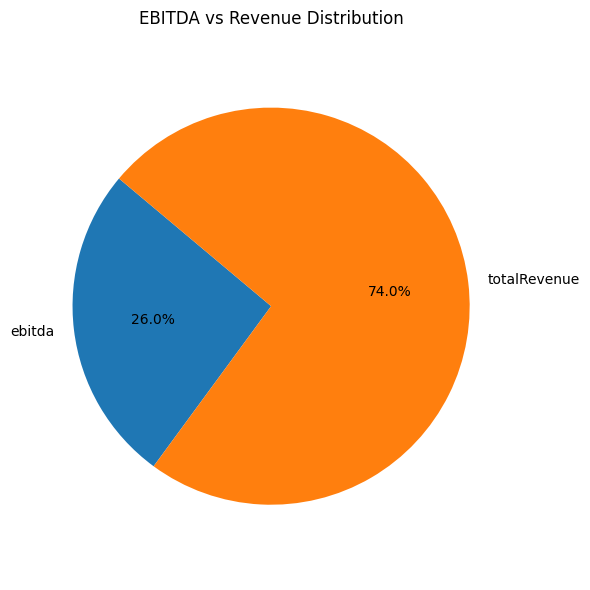

Displayed pie chart EBITDA vs Revenue Distribution


In [ ]:
# Load CSV, filter for totalRevenue and ebitda, and plot a pie chart.
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

csv_filename = 'Coca-Cola_stock_info (1).csv'

# Load once
if 'df_coke' not in locals():
    if os.path.exists(csv_filename):
        df_coke = pd.read_csv(csv_filename)
        print('Loaded CSV into df_coke with shape:')
        print(df_coke.shape)
        print('Head:')
        print(df_coke.head())
    else:
        print('File not found: ' + csv_filename)

if 'df_coke' in locals():
    # Normalize columns
    df_coke.columns = [str(c).strip() for c in df_coke.columns]

    # If Key/Value format, filter
    if set(df_coke.columns) == set(['Key', 'Value']):
        # Normalize key text and coerce numeric values
        df_coke['KeyLow'] = df_coke['Key'].str.strip().str.lower()
        df_coke['ValueNum'] = pd.to_numeric(df_coke['Value'], errors='coerce')
        filtered = df_coke[df_coke['KeyLow'].isin(['totalrevenue', 'ebitda'])].copy()

        print('Filtered rows head:')
        print(filtered[['Key', 'Value']].head())

        # If multiple rows per key, aggregate (sum) to single value per key
        agg = filtered.groupby('Key', as_index=False)['ValueNum'].sum()
        print('Aggregated values:')
        print(agg)

        # Plot pie if we have both keys and values
        if not agg.empty and agg['ValueNum'].gt(0).any():
            plt.figure(figsize=(6,6))
            plt.pie(agg['ValueNum'], labels=agg['Key'], autopct='%1.1f%%', startangle=140)
            plt.title('EBITDA vs Revenue Distribution')
            plt.axis('equal')
            plt.tight_layout()
            plt.show()
            print('Displayed pie chart EBITDA vs Revenue Distribution')
        else:
            print('No numeric values found for totalRevenue or ebitda to plot.')
    else:
        # If different schema, try to find columns directly
        cols = [c for c in df_coke.columns]
        print('Columns present:')
        print(cols)
        print('This dataset may not be Key/Value format. Please confirm where totalRevenue and ebitda are located.')

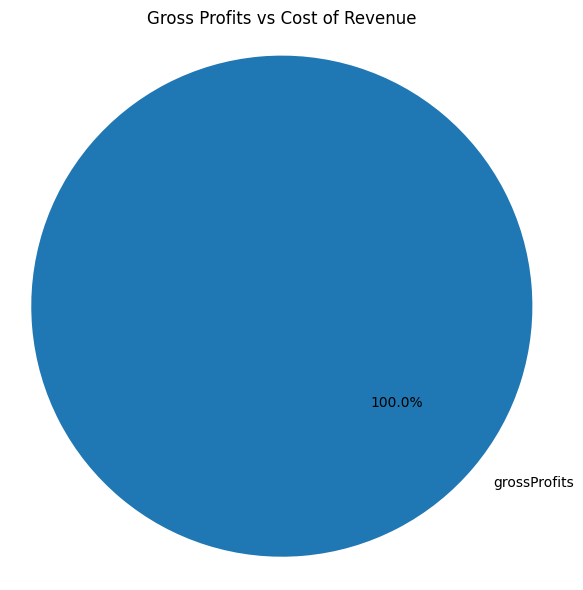

Displayed pie chart Gross Profits vs Cost of Revenue


In [ ]:
# Generate pie chart for Gross Profits vs Cost of Revenue
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_coke is loaded and processed (assuming the previous cell was run)
if 'df_coke' in locals() and set(df_coke.columns) == set(['Key', 'Value', 'KeyLow', 'ValueNum']):
    # Filter for relevant keys
    filtered_gp_cr = df_coke[df_coke['KeyLow'].isin(['grossprofits', 'costofrevenue'])].copy()

    # Aggregate values
    agg_gp_cr = filtered_gp_cr.groupby('Key', as_index=False)['ValueNum'].sum()

    # Plot pie chart if data is available and positive
    if not agg_gp_cr.empty and agg_gp_cr['ValueNum'].gt(0).any():
        plt.figure(figsize=(6,6))
        plt.pie(agg_gp_cr['ValueNum'], labels=agg_gp_cr['Key'], autopct='%1.1f%%', startangle=140)
        plt.title('Gross Profits vs Cost of Revenue')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        print('Displayed pie chart Gross Profits vs Cost of Revenue')
    else:
        print('No numeric values found for Gross Profits or Cost of Revenue to plot.')
else:
    print("df_coke not found or not in expected Key/Value format with processed columns.")

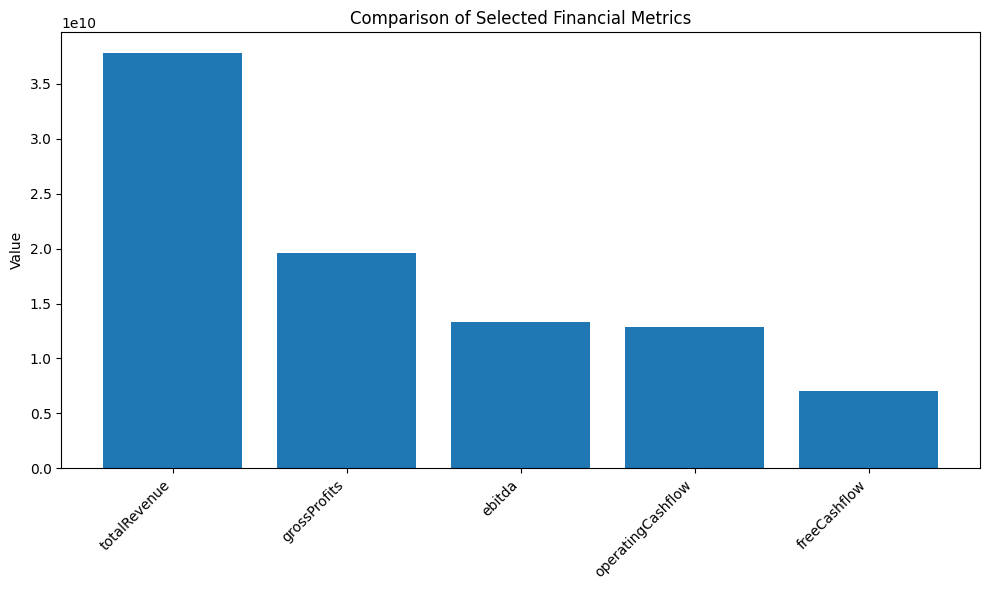

Displayed bar chart comparing selected financial metrics


In [ ]:
# Generate a bar chart for selected financial metrics
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_coke is loaded and processed
if 'df_coke' in locals() and 'KeyLow' in df_coke.columns and 'ValueNum' in df_coke.columns:
    # Filter for relevant keys with numeric values
    selected_keys = ['totalrevenue', 'ebitda', 'grossprofits', 'operatingcashflow', 'freecashflow']
    filtered_metrics = df_coke[df_coke['KeyLow'].isin(selected_keys)].copy()

    # Aggregate values if multiple rows per key (shouldn't be the case for these)
    agg_metrics = filtered_metrics.groupby('Key', as_index=False)['ValueNum'].sum()

    # Sort values for better visualization
    agg_metrics = agg_metrics.sort_values('ValueNum', ascending=False)


    if not agg_metrics.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(agg_metrics['Key'], agg_metrics['ValueNum'])
        plt.ylabel('Value')
        plt.title('Comparison of Selected Financial Metrics')
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout()
        plt.show()
        print('Displayed bar chart comparing selected financial metrics')
    else:
        print('No numeric values found for the selected metrics to plot a bar chart.')
else:
    print("df_coke not found or not in expected format.")

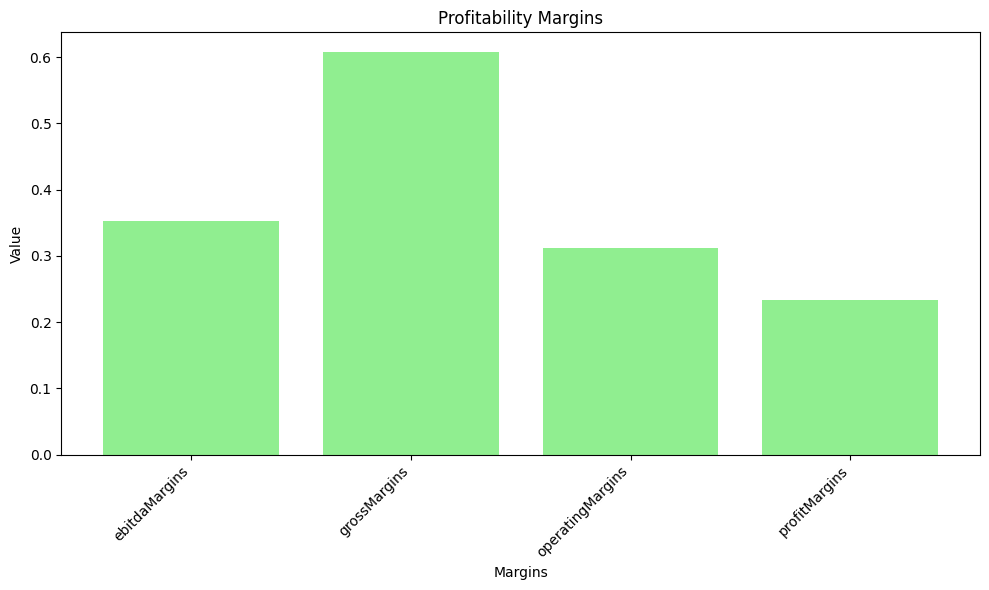

Displayed bar chart for profitability margins


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_coke is loaded and processed
if 'df_coke' in locals() and 'KeyLow' in df_coke.columns and 'ValueNum' in df_coke.columns:
    # Filter for the specified keys
    data = df_coke[df_coke['KeyLow'].isin(['profitmargins', 'grossmargins', 'ebitdamargins', 'operatingmargins'])].copy()

    # Aggregate values if multiple rows per key (shouldn't be necessary for margins but good practice)
    agg_data = data.groupby('Key', as_index=False)['ValueNum'].sum()

    if not agg_data.empty:
        plt.figure(figsize=(10, 6))
        plt.bar(agg_data['Key'], agg_data['ValueNum'], color='lightgreen')
        plt.title("Profitability Margins")
        plt.xlabel("Margins")
        plt.ylabel("Value")
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout()
        plt.show()
        print('Displayed bar chart for profitability margins')
    else:
        print('No numeric values found for the selected margins to plot.')
else:
    print("df_coke not found or not in expected format.")

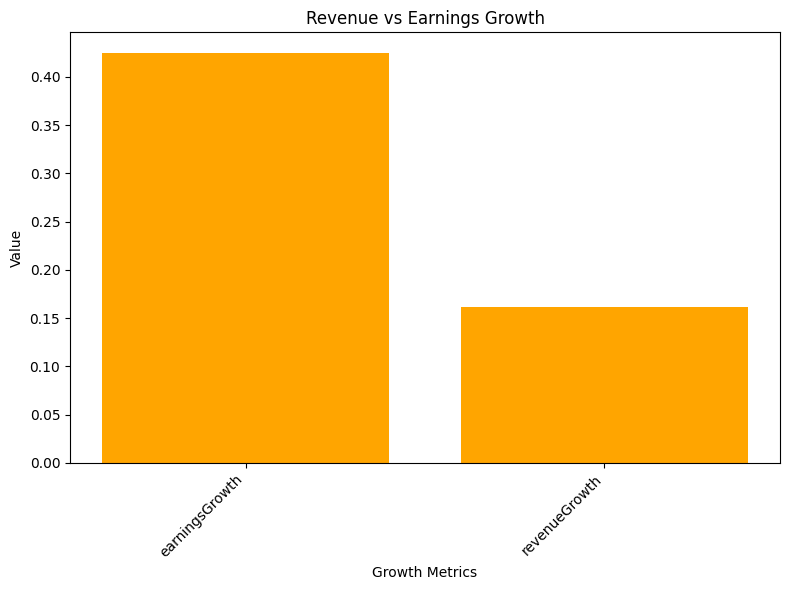

Displayed bar chart for Revenue vs Earnings Growth


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_coke is loaded and processed
if 'df_coke' in locals() and 'KeyLow' in df_coke.columns and 'ValueNum' in df_coke.columns:
    # Filter for the specified keys
    data = df_coke[df_coke['KeyLow'].isin(['revenuegrowth', 'earningsgrowth'])].copy()

    # Aggregate values if multiple rows per key
    agg_data = data.groupby('Key', as_index=False)['ValueNum'].sum()

    if not agg_data.empty and agg_data['ValueNum'].notna().any():
        plt.figure(figsize=(8, 6))
        plt.bar(agg_data['Key'], agg_data['ValueNum'], color='orange')
        plt.title("Revenue vs Earnings Growth")
        plt.xlabel("Growth Metrics")
        plt.ylabel("Value")
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout()
        plt.show()
        print('Displayed bar chart for Revenue vs Earnings Growth')
    else:
        print('No numeric values found for Revenue Growth or Earnings Growth to plot.')
else:
    print("df_coke not found or not in expected format.")

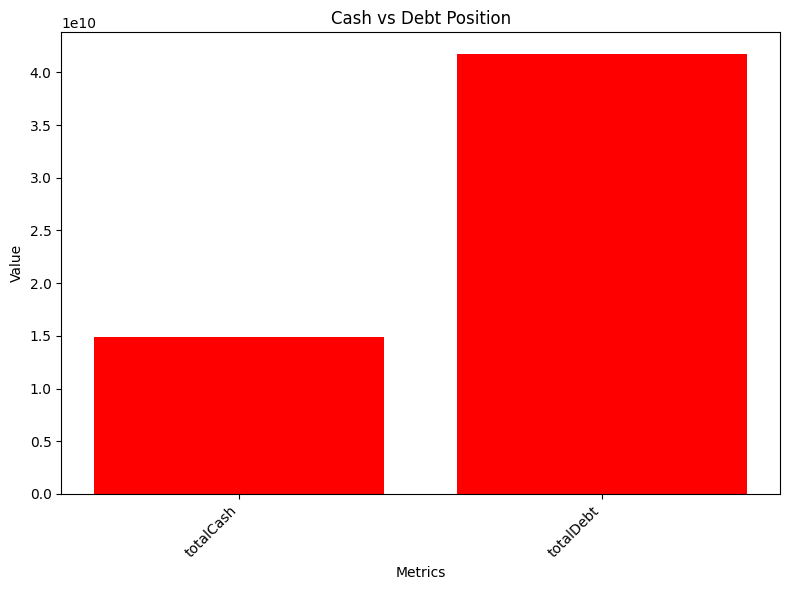

Displayed bar chart for Cash vs Debt Position


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_coke is loaded and processed
if 'df_coke' in locals() and 'KeyLow' in df_coke.columns and 'ValueNum' in df_coke.columns:
    # Filter for the specified keys
    data = df_coke[df_coke['KeyLow'].isin(['totalcash', 'totaldebt'])].copy()

    # Aggregate values if multiple rows per key
    agg_data = data.groupby('Key', as_index=False)['ValueNum'].sum()

    if not agg_data.empty and agg_data['ValueNum'].notna().any():
        plt.figure(figsize=(8, 6))
        plt.bar(agg_data['Key'], agg_data['ValueNum'], color='red')
        plt.title("Cash vs Debt Position")
        plt.xlabel("Metrics")
        plt.ylabel("Value")
        plt.xticks(rotation=45, ha='right') # Rotate labels for readability
        plt.tight_layout()
        plt.show()
        print('Displayed bar chart for Cash vs Debt Position')
    else:
        print('No numeric values found for Total Cash or Total Debt to plot.')
else:
    print("df_coke not found or not in expected format.")

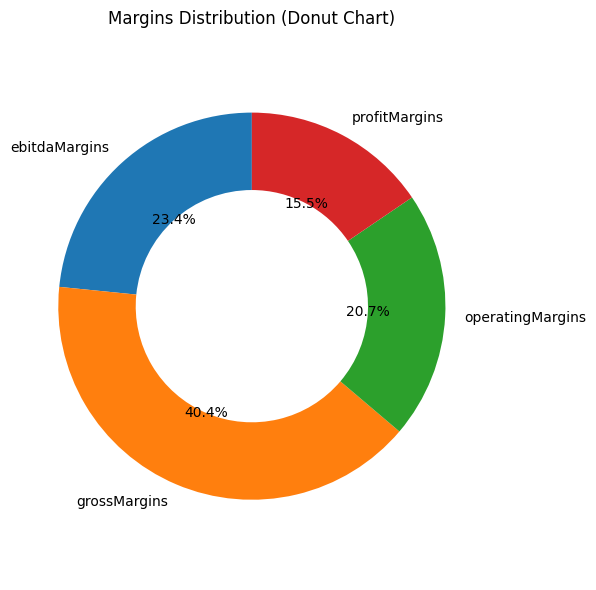

Displayed donut chart for Margins Distribution


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure df_coke is loaded and processed
if 'df_coke' in locals() and 'KeyLow' in df_coke.columns and 'ValueNum' in df_coke.columns:
    # Filter for the specified keys
    data = df_coke[df_coke['KeyLow'].isin(['profitmargins', 'grossmargins', 'ebitdamargins', 'operatingmargins'])].copy()

    # Aggregate values if multiple rows per key
    agg_data = data.groupby('Key', as_index=False)['ValueNum'].sum()

    # Plot pie chart if data is available and positive
    if not agg_data.empty and agg_data['ValueNum'].gt(0).any():
        plt.figure(figsize=(6,6))
        plt.pie(agg_data['ValueNum'], labels=agg_data['Key'], autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.4))
        plt.title("Margins Distribution (Donut Chart)")
        plt.axis('equal')
        plt.tight_layout()
        plt.show()
        print('Displayed donut chart for Margins Distribution')
    else:
        print('No numeric values found or all values are zero for the selected margins to plot a donut chart.')
else:
    print("df_coke not found or not in expected format.")